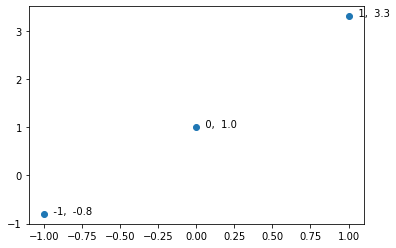

In [518]:
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex, Image
import numpy as np
from mpl_toolkits import mplot3d
from matplotlib import cm

x = np.array([-1,0,1])
y = np.array([-0.8,1,3.3])

def plot_original_points():
    plt.scatter(x,y)
    for i in range(3):
        plt.annotate(xy=(x[i], y[i]), text=f"   {x[i]},  {y[i]}")

plot_original_points()

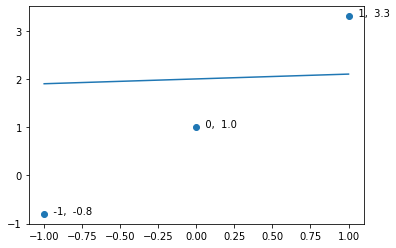

In [519]:
m = 0.1
c = 2
y_pred = m * x + c
plt.plot(x, y_pred)
plot_original_points()

In [520]:
print("Objective: Minimize following loss")
display(Math(r'Loss = \sum_{i=1}^{N}(x_i-y_i)^2'))
print("Reason for square: To obtain a possible loss whenever there is a difference regardless of order")

Objective: Minimize following loss


<IPython.core.display.Math object>

Reason for square: To obtain a possible loss whenever there is a difference regardless of order


In [521]:
display(Math(r'Loss = (x_1-y_1)^2 +(x_2-y_2)^2 +(x_3-y_3)^2'))

<IPython.core.display.Math object>

In [522]:
def get_loss(y, y_pred):
    return np.square(y_pred - y).sum()

def get_y_pred(m,c):
    y_preds = np.zeros((m.shape[0], m.shape[1], len(x)))
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            y_preds[i][j] = m[i][j] * x + c[i][j]
    return y_preds

<Axes3DSubplot:xlabel='m', ylabel='c'>

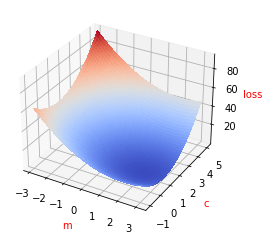

In [523]:
def plot_loss(alpha=1):
    m_values = np.linspace(m-3,m+3, 100)
    c_values = np.linspace(c-3,c+3, 100)
    meshgrid_X, meshgrid_Y = np.meshgrid(m_values, c_values)
    y_preds = get_y_pred(meshgrid_X, meshgrid_Y)
    losses = np.zeros((meshgrid_X.shape[0], meshgrid_X.shape[1]))
    for i in range(meshgrid_X.shape[0]):
        for j in range(meshgrid_X.shape[1]):
            losses[i][j] = get_loss(y, y_preds[i][j])
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(meshgrid_X, meshgrid_Y, losses, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=alpha)
    ax.set_xlabel("m")
    ax.set_ylabel("c")
    ax.set_zlabel("loss")
    ax.xaxis.label.set_color('red')
    ax.yaxis.label.set_color('red')
    ax.zaxis.label.set_color('red')
    return ax

plot_loss()

Plot current m,c,loss


Text(2, 1, 'An optimal Loss')

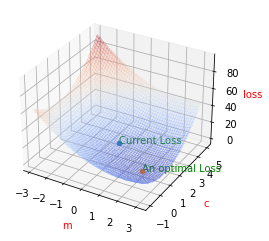

In [524]:
print("Plot current m,c,loss")
loss = get_loss(y, y_pred)
ax = plot_loss(0.2)
ax.scatter3D(m,c,loss,"green")
ax.text(m, c, loss, f"Current Loss", color='green')

m = 2
c = 1
y_pred = m * x + c
loss = get_loss(y, y_pred)
ax.scatter3D(m,c,loss,"green")
ax.text(m, c, loss, f"An optimal Loss", color='green')



In [563]:
print("Now objective is to gradually update m and c in a way so that current loss goes as close as optimal loss (i.e. close to 0)")
print("We achieve it through gradient descent")
display(Math(r'Gradient\ of Loss\ w.r.t\ m =  \frac{\partial Loss}{\partial m}'))
display(Math(r'=  (\frac{\partial Loss}{\partial \hat{y}}) * (\frac{\partial \hat{y}}{\partial m})  [Chain\ rule]'))
display(Math(r'=  (\sum_{i=1}^{N} \frac{\partial (\hat{y_i} - y_i)^2 }{\partial \hat{y_i}}) *  (\sum_{i=1}^{N} \frac{\partial (m*x_i + c)}{\partial m})'))
display(Math(r'=  (\sum_{i=1}^{N} \frac{\partial (\hat{y_i} - y_i)^2 }{\partial \hat{y_i}}) *  (\sum_{i=1}^{N}x_i)'))
display(Math(r'=  ( (\frac{\partial (\hat{y_1} - y_1)^2 }{\partial \hat{y_1}}) + (\frac{\partial (\hat{y_2} - y_2)^2 }{\partial \hat{y_2}}) + ... + (\frac{\partial (\hat{y_N} - y_N)^2 }{\partial \hat{y_N}}) )*  (\sum_{i=1}^{N}x_i)'))
display(Math(r'=  ( '
             r'(2*(\hat{y_1} - y_1)*\frac{\partial (\hat{y_1} - y_1)}{\partial \hat{y_1}}) +'
             r'(2*(\hat{y_2} - y_2)*\frac{\partial (\hat{y_2} - y_2)}{\partial \hat{y_2}}) +'
             r'(...) +'
             r'(2*(\hat{y_N} - y_N)*\frac{\partial (\hat{y_N} - y_N)}{\partial \hat{y_N}})'
             r') *  (\sum_{i=1}^{N}x_i)'))
display(Math(r'=  ( '
             r'(2*(\hat{y_1} - y_1)*(\frac{\partial \hat{y_1} }{\partial \hat{y_1}}-\frac{\partial y_1}{\partial \hat{y_1}}) +'
             r'(2*(\hat{y_2} - y_2)*(\frac{\partial \hat{y_2} }{\partial \hat{y_2}}-\frac{\partial y_2}{\partial \hat{y_2}}) +'
             r'(...) +'
             r'(2*(\hat{y_N} - y_N)*(\frac{\partial \hat{y_N} }{\partial \hat{y_N}}-\frac{\partial y_N}{\partial \hat{y_N}})'
             r') *  (\sum_{i=1}^{N}x_i)'))
display(Math(r'=  ( '
             r'(2*(\hat{y_1} - y_1)*(1-0)) +'
             r'(2*(\hat{y_2} - y_2)*(1-0)) +'
             r'(...) +'
             r'(2*(\hat{y_N} - y_N)*(1-0))'
             r') *  (\sum_{i=1}^{N}x_i)'))
display(Math(r'=  ( '
             r'(2*(\hat{y_1} - y_1)*(1-0)) +'
             r'(2*(\hat{y_2} - y_2)*(1-0)) +'
             r'(...) +'
             r'(2*(\hat{y_N} - y_N)*(1-0))'
             r') *  (\sum_{i=1}^{N}x_i)'))

Now objective is to gradually update m and c in a way so that current loss goes as close as optimal loss (i.e. close to 0)
We achieve it through gradient descent


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [526]:
print("Iteratively add a factor of negative gradient with m (learning rate * grad_m)")

Iteratively add a factor of negative gradient with m (learning rate * grad_m)
